# Introduction

Many of the models that we have considered up to this point involved two components: (1) a set of perceptual-motor processes and (2) a single memory retrieval. To simplify the model, the perceptual-motor processing time was treated as a constant rather than a random variable. Although this type of model may work in many situations, there are situations in which more complex models need to be developed. How do we develop a model in cases where there are multiple memory retrievals associated with a single response or in cases where we want to treat the perceptual-motor processes as a random variable instead of a constant? In this tutorial, we will use a method called fast Fourier transform to convolve or sum multiple random variables. We will illustrate how to use fast Fourier transform for convolution using the Count Model from the Lisp ACT-R tutorial, which entails a series of memory retrievals that culminate into an observed response.  

## Count Task

At the begining of a trial, two numbers are displayed on the screen: (1) a start number, and (2) an end number. Th task requires a person to count from the start number to the end number and press a key upon completion. We will designate 2 as the start number and 4 as the end number.

# Count Model

## Overview

The count model begins with a set of production rules that encode the start and end number displayed on a screen. The first production rule sets the goal to count, finds the stimulus, and creates a chunk in the imaginal buffer to hold the start and end numbers. The next production rule shifts visual attention the stimulus for encoding. Next, a production rule retrieves the meaning of the number. Note that because base-level activation is set to 10, retrieval times are neglible. Finally, the value associated with the value slot of the retrieved chunk is transferred to the imaginal buffer where it is added to the start slot. A similar process is repeated for the end number stimulus. 

Once the stimuli are encoded into the chunk in the imaginal buffer, the model proceeds through a series of retrievals of "count-order" chunks to increment from the start number to the end number. Each "count-order" chunk contains a slot for the current number and the next number. The counting process begins with the selection of a production rule that issues a retrieval request for a "count-order" chunk with a current slot value equal to the start number. Upon retrieving the "count-order" chunk, an increment count production rule is fired to increment the count. This production sets the current count to the the value of the "next" slot of the retrieved chunk and issues new retrieval request using the same "next" value for the "current" slot. In essence, this creates a loop or chain in which the count is incremented and the subsequent chunk is retrieved until the end number is reached. When the end number is reached, a "stop" production rule issues a command to press the "j" key. 
 


## Declarative Memory

Declarative memory $M$ consists of chunks with slots $Q = \rm \{current, next\}$. The slot "current" holds the value of the current number in the counting process. The slot "next" holds the number that immediately follows the current number. For example, chunk $m$ could be defined as:

\begin{align}
\mathbf{c}_m = \rm \{(current,1),(next,2) \}
\end{align}


## Activation

Activation for chunk $m$ is defined as:

$a_m = \rm blc + \epsilon_m$

where blc is the base level constant and $\epsilon_m \sim \rm Normal(0,\sigma)$. Note that $E[a_m] = \mu_m$. Given that numbers are well-learned, we assume that confusions are not possible and that the correct number is always retrieved.

## Retrieval Request

When incrementing the count, a new retrieval request is defined as

\begin{align}
\mathbf{r} = \rm \{current, c_{r,\textrm{retrieval}}(next)\} 
\end{align}

where $\mathbf{c}_{r,\textrm{retrieval}}$ is the chunk in the retrieval buffer. The result of the retrieval request becomes the new chunk in the retrieval buffer, $\mathbf{c}_{j,\textrm{retrieval}}$. For example, if $\rm \mathbf{c}_{r,\textrm{retrieval}} = \{\rm(current,1),(next,2) \}$, then $\mathbf{r} = \{\rm(current,2)\}$ and the new chunk $\rm \mathbf{c}_{j,\textrm{retrieval}} = \{\rm(current,2),(next,3)\}$.

## Response Mapping

The model will respond once the current value of the chunk in the retrieval buffer is equal to the goal number of 4. Formally, we define the response mapping as

\begin{equation}
 \rm p_i(end) = c_{r,retrieval}(current)
\end{equation}

where $\mathbf{p_i} = \rm \{(end,4)\}$ is production rule $i$ and the slot "end" holds the goal state of 4. 


## Convolution

Our basic approach will be to use a normal approximation to convolve conflict resolution and perceptual-motor time and to use FFT to convolve memory retrieval times with the sum of the conflict resolution and perceptual-motor time. 

In order to provide some intuition behind convolution, it might be helpful to consider the trace from the computational version of the count model:

     Time    Module                 Status
     0.000   GOAL                   SET-BUFFER-CHUNK GOAL CURRENT-GOAL REQUESTED NIL 
     0.000   VISION                 SET-BUFFER-CHUNK VISUAL-LOCATION VISUAL-LOCATION0-0 REQUESTED NIL 
     0.042   PROCEDURAL             PRODUCTION-FIRED START 
     0.042   VISION                 SET-BUFFER-CHUNK VISUAL-LOCATION VISUAL-LOCATION0-0 
     0.179   IMAGINAL               SET-BUFFER-CHUNK IMAGINAL QUESTION0 
     0.244   PROCEDURAL             PRODUCTION-FIRED ATTEND-VISUAL-LOCATION 
     0.333   VISION                 SET-BUFFER-CHUNK VISUAL TEXT0 
     0.399   PROCEDURAL             PRODUCTION-FIRED RETRIEVE-MEANING 
     0.399   DECLARATIVE            SET-BUFFER-CHUNK RETRIEVAL TWO 
     0.443   PROCEDURAL             PRODUCTION-FIRED ENCODE-START-NUMBER 
     0.443   VISION                 SET-BUFFER-CHUNK VISUAL-LOCATION VISUAL-LOCATION1-0 
     0.499   PROCEDURAL             PRODUCTION-FIRED ATTEND-VISUAL-LOCATION 
     0.596   VISION                 SET-BUFFER-CHUNK VISUAL TEXT1 
     0.641   PROCEDURAL             PRODUCTION-FIRED RETRIEVE-MEANING 
     0.641   DECLARATIVE            SET-BUFFER-CHUNK RETRIEVAL FOUR 
     0.698   PROCEDURAL             PRODUCTION-FIRED ENCODE-END-NUMBER 
     0.757   PROCEDURAL             PRODUCTION-FIRED START-COUNT 
     1.012   DECLARATIVE            SET-BUFFER-CHUNK RETRIEVAL C 
     1.070   PROCEDURAL             PRODUCTION-FIRED INCREMENT 
     1.381   DECLARATIVE            SET-BUFFER-CHUNK RETRIEVAL D 
     1.431   PROCEDURAL             PRODUCTION-FIRED INCREMENT 
     1.490   PROCEDURAL             PRODUCTION-FIRED STOP 
     1.490   MOTOR                  PRESS-KEY j 
     
As you can see, current model time increments each time a new cognitive process is executed. The processing time for each of these processes is summed to produce a reaction time of 1.49 seconds. In summary, we sum 11 conflict resolutions, 2 visual attention shifts, 1 chunk creation in the imaginal buffer, 2 memory retrievals, and 1 motor execution. 

## Conflict resolution and perceptual-motor time


In ACT-R, conflict resolution and perceptual motor processing time (i.e. visual attention, motor execution) are often fixed to default values as a simplifying assumption. However, it is possible to treat conflict resolution and perceptual motor time as a random variable. ACT-R takes a somewhat unconventional approach of using uniform distributions each distribution. A Uniform distribution is defined by two parameters: 

- $u_{\rm min}$: the minumum value
- $u_{\rm max}$: the maximum value

In ACT-R, parameters $u_{\rm min}$ and $u_{\rm max}$ are defined in terms of the mean processing time $\mu$ as follows:

\begin{align}
u_\text{min} = \mu - \frac{\mu}{3}
\end{align}


\begin{align}
u_\text{max} = \mu + \frac{\mu}{3}
\end{align}

These definitions indicate the range and variance of processing time increases as a function of mean processing time. 

### Normal Approximation

The sum of Uniform random variables is a [Irwin-Hall distribution
](https://en.wikipedia.org/wiki/Irwin%E2%80%93Hall_distribution). Unfortunately, the Irwin-Hall has at least two limitations. First, computing the pdf is more computationally expensive compared to the pdf of alternative distributions, even in the simple case where $u_{\rm min} = 0$ and $u_{\rm max} = 1$ . Second, the pdf becomes more complex in the general case in which the parameters differ.

Fortunately, the Irwin-Hall distribution can be easily approximated with a normal distribution as long as the standard deviations of the component distributions are not drastically different. The code block below provides an illustration of the approximation. It is clear that the approximation works well with as few as three random variables.  

In [1]:
cd(@__DIR__)
using Pkg
Pkg.activate("../../")
using StatsPlots, Random, ACTRModels, CSV, FFTDists, DifferentialEvolutionMCMC
using MCMCChains
include("Count.jl")
Random.seed!(76121);

  Activating environment at `~/.julia/dev/ACTRFundamentalTools/Project.toml`


┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1342


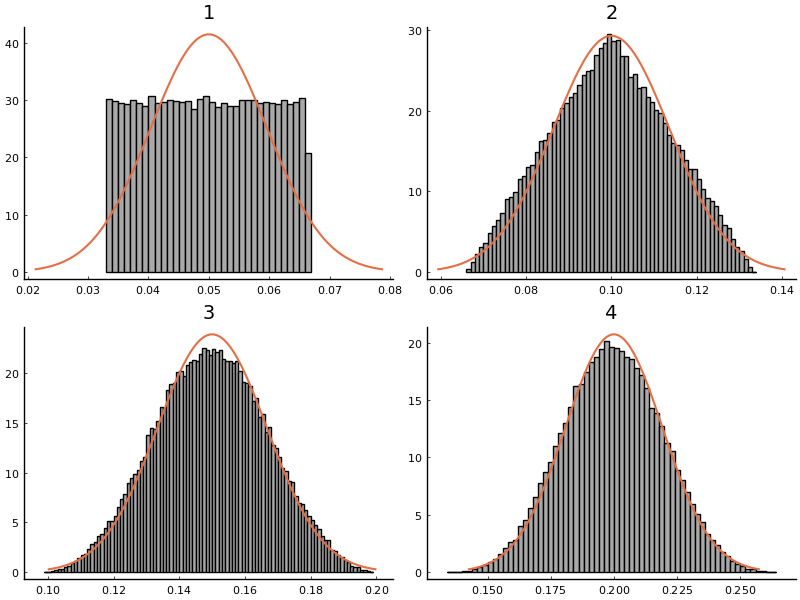

In [3]:
# simulate sum of n uniform random variables representing conflict resolution time
sum_n(n) = sum(rand(Uniform(0.033,0.0667), 10^5, n), dims=2)

# normal approximation of n uniform random variables
function normal_density(n)
    μ,σ = convolve_normal(;cr=(μ=0.05,N=n))
    x = range(-3*σ + μ, 3*σ + μ, length = 100)
    d = pdf.(Normal(μ,σ), x)
    return x,d
end

# simulate sum of n uniform random variables
samples = map(n -> sum_n(n), 1:4)
# density of normal approximation
density = map(n -> normal_density(n), 1:4)
pyplot()
#  plot histograms
hist_plot = histogram(samples, grid=false, layout=(2,2), title = ["1" "2" "3" "4"], leg=false, color=:darkgrey,
    norm=true, size=(800,600))
# superimpose densities
plot!(hist_plot, density, linewidth=1.5)

In order to use the Normal approximation, we must first define the mean and standard deviation of a Uniform distribution. The mean of a Uniform distribution is:

\begin{align}
\mu = \frac{u_\text{max}-u_\text{min}}{2}
\end{align}

The standard deviation of a Uniform distribution is:

\begin{align}
\sigma = \sqrt{\frac{1}{12}\left(u_\text{max}-u_{min}\right)^2}
\end{align}

After subtituting the definitions of $u_{\rm min}$ and $u_{\rm max}$ and simplifying, we get the following for the standard deviation for ACT-R:

\begin{align}
\sigma = \sqrt{\frac{1}{12}\left(\mu + \frac{\mu}{3} - \left(\mu - \frac{\mu}{3}\right) \right)^2} = \frac{\mu}{3}\sqrt{\frac{1}{3}}
\end{align}

We will fix mean processing times for conflict resolution, attention latency, imaginal latency, and motor execution to their default values:  $\mu_{\text{cr}}= .050$, $\mu_{a} = .085$, $\mu_{\text{im}}$ and $\mu_{\text{me}} = .210$, respectively. Given that the component distributions are Normal, the parameters for sum of conflict resolution and perceptual-motor processing times can be found by summing $\mu$ and $\sigma^2$ parameters as follows:

\begin{align}
\mu_{\rm pm} = 11\mu_{\text{cr}} + \mu_{\text{me}} + \mu_{\text{im}} + 2\mu_{a}
\end{align}

\begin{align}
\sigma_{\rm pm} = \sqrt{11\sigma_{\text{cr}}^2 + \sigma_{\text{me}}^2 + \sigma_{\text{im}}^2 + 2\sigma_{a}^2}
\end{align}

The standard deviation of a Uniform distribution is:

\begin{align}
\sigma = \sqrt{\frac{1}{12}\left(u_\text{max}-u_{min}\right)^2}
\end{align}

## Assumptions

1. Retrieval failures are possible
2. Activation is identical and constant for each chunk except for noise
3. Each data point is independent of others
4. Reaction times follow a Lognormal distribution

# Generate Data

We will use the functions below to generate data for parameter estimation. The `simulate` function accepts the following arguments

- N: the number of data points
- s: the logistic scale parameter
- blc: a constant value added to activation

`simulate` is a high-level function that performs two actions: (1) it creates the model object by calling the function `construct_model`, and (2) draws `N` samples from the resulting model object. The function `construct_model` is responsible for defining the model and has the following arguments:


- $\alpha$: deterministic part of activation
- s: the logistic scale parameter

First, `construct_model` generates the parameters $\mu$ and $\sigma$ for sum of conflict resolution and percpetual-motor processing time. Second, it generates the final model based on a normal distribution object and two lognormal distribution objects. 

In [4]:
function simulate(N; s, blc)
    # construct the model object
    model = construct_model(blc, s)
    # generate N simulated trials
    return rand(model, N)
end

function construct_model(α, s)
  # standard deviation of activation noise in log space
  λ = s * π / sqrt(3)
  # μ and σ parameters for perceptual motor processes
  μ,σ = convolve_normal(motor=(μ=0.21,N=1), cr=(μ=0.05,N=11),visual=(μ=0.085,N=2),
  imaginal=(μ=0.2,N=1))
  # create a model object: perceptual motor processes with two memory retrievals
  model = Normal(μ, σ) + LogNormal(-α, λ) + LogNormal(-α, λ)
  return model
end

construct_model (generic function with 1 method)


In the code block below, 50 simulated reaction times are simulated from the model


In [5]:
# number of simulated trials
n_trials = 50
# logistic scalar for activation noise
s = 0.3
# base level constant
blc = 1.5
# generate simulated data
data = simulate(n_trials; s, blc);

## Define Likelihood Function


The Normal PDF with the shorthand notation $\gamma = \{\mu, \sigma\}$ is,

$f_{\rm Normal}(t; \gamma) = \frac{1}{\sigma \sqrt{2\pi}}e^{- \frac{(t-\mu)^2}{2\sigma^2} }.$

The Lognormal PDF is given by: 

$f_{\rm Lognormal}(t; \mu, \sigma) = \frac{1}{t\sigma \sqrt{2\pi}}e^{- \frac{\left(log(t)-\mu\right)^2}{2\sigma^2} }.$

As described in the standard ACT-R tutorial, the task requires the model to count from two to four, meaning there are two memory retrievals---one retrieval to increment from two to three, and one retrieval to increment from three to four. Thus, the likelihood function for the Count model is the convolution of the non-memory retrieval processes (normally distributed) and the two retrieval PDFs (lognormally distributed): 

$f(t \mid\text{blc},s) = (f_{{\rm Normal};\gamma_{\rm pm}}* f_{{\rm Lognormal}; \mu, \sigma} * f_{{\rm Lognormal}; \mu, \sigma})(t).$

where $*$ is the convolution operator.


The function `loglike` computes the log likelihood of the data, which has the following arguments:

- blc: the base-level constant parameter
- s: the logistic scalar parameter
- data: a vector of reaction times

`loglike` constructs a model object, convolves the model object and uses the model object to compute the log likelihood of all rts in `data`. 

In [6]:
function loglike(data, blc, s)
  # construct model object
  model = construct_model(blc, s)
  # convolve the component distributions
  convolve!(model)
  # compute the sum log likelihood across all data points
  LL = logpdf.(model, data)
  return sum(LL)
end

loglike (generic function with 1 method)

## Plot likelihood function

In the following code block, we will validate the likelihood function by overlaying it on top of a histogram of simulated data. As you can see, the likelihood provides a close fit to the histogram. 

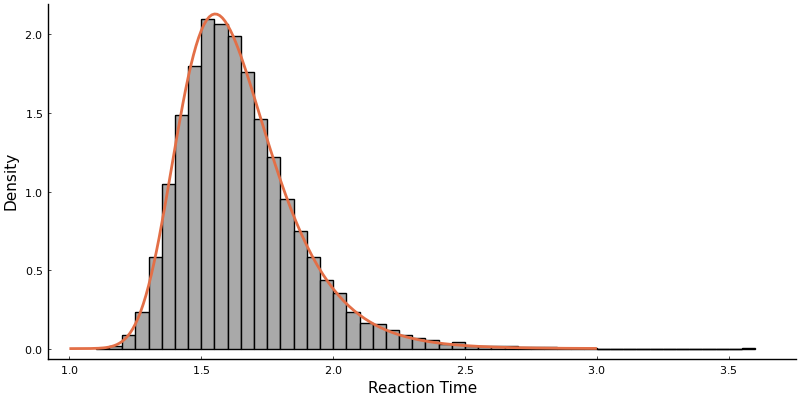

In [7]:
n_trials = 10_000
s = 0.3
blc = 1.5
times = 1:0.01:3.0
sim_data = simulate(n_trials; s=s, blc=blc);
histogram(sim_data, color=:darkgrey, grid=false, norm=true, leg=false, size=(800,400),
    xlabel="Reaction Time", ylabel="Density")
density = map(x-> loglike(x, blc, s) |> exp, times)
# plot density 
plot!(times, density, linewidth=2)

## Define Model

The model and prior distributions are summarized as follows:

\begin{align}
\rm blc \sim \rm Normal(1.5,1)
\end{align}

\begin{align}
s \sim \textrm{TNormal}(.3, .5)_{0}^{\infty}
\end{align}

\begin{align}
\rm rt_{i} \sim f(\rm blc, s)
\end{align}

In computer code, the model is specified as follows:

In [8]:
# prior distributions
priors = (
    blc = (Normal(1.5, 1),),
    s = (Truncated(Normal(0.3, 0.5), 0.0, Inf),)
)
# lower and upper bounds of each parameter
bounds = ((-Inf,Inf),(eps(),Inf))
# define model object
model = DEModel(;priors, model=loglike, data)
# define DE sampler object
de = DE(;priors, bounds, burnin=1000)

DE{Tuple{Tuple{Float64, Float64}, Tuple{Float64, Float64}}, typeof(random_gamma), typeof(DifferentialEvolutionMCMC.Metropolis_Hastings_update!), typeof(compute_posterior!), typeof(sample)}(4, 6, 1000, true, 0.1, 0.1, 0.001, 0.05, 1.0, 0.0, ((-Inf, Inf), (2.220446049250313e-16, Inf)), 0, 1, DifferentialEvolutionMCMC.random_gamma, DifferentialEvolutionMCMC.Metropolis_Hastings_update!, DifferentialEvolutionMCMC.compute_posterior!, StatsBase.sample)

## Estimate Parameters

Now that the priors, likelihood, and Turing model have been specified, we can now estimate the parameters. In the following code, we will run four MCMC chains with the Differential Evolution MCMC (DEMCMC). We will sample for 2,000 iterations and omit the first 1,000 warmup samples. 

In [9]:
n_iter = 2000
chain = sample(model, de, MCMCThreads(), n_iter, progress=true)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:28


Chains MCMC chain (1000×4×24 Array{Float64, 3}):

Iterations        = 1:1:1000
Number of chains  = 24
Samples per chain = 1000
parameters        = blc, s
internals         = acceptance, lp

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

         blc    1.5170    0.0721     0.0005    0.0015   1968.2946    1.0139
           s    0.3444    0.0419     0.0003    0.0009   2089.9418    1.0096

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

         blc    1.3828    1.4683    1.5134    1.5622    1.6683
           s    0.2737    0.3146    0.3406    0.3705    0.4367


┌ Warning: timestamp of type Missing unknown
└ @ MCMCChains /home/dfish/.julia/packages/MCMCChains/VwH27/src/chains.jl:364
┌ Warning: timestamp of type Missing unknown
└ @ MCMCChains /home/dfish/.julia/packages/MCMCChains/VwH27/src/chains.jl:364


## Results


The posterior distributions for each parameter are summarized in the output above. Beginning with the trace plot, we see that there are no appearent problems or irregularities. Compared the the previous tutorials that used the NUTS algorithm, autocorrelation is greater for DEMCMC. This is quite normal, as DEMCMC is not as efficient as NUTS. Importantly, however, all of the autocorrelations gradually decrease and none are stuck at a high value for too long. The density plots indicate that the posterior distributions are close to the data generating parameter values for blc and $s$.

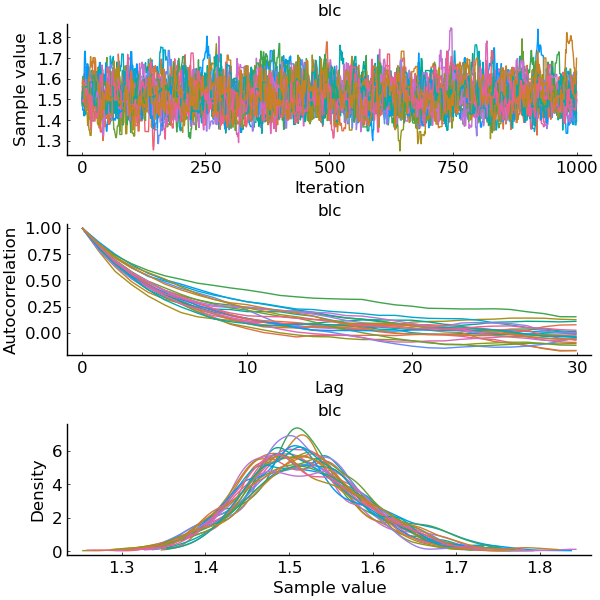

In [10]:
pyplot()
ch = group(chain,:blc)
font_size = 12
p1 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:traceplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p2 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:autocorplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p3 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:mixeddensity),
  grid=false, size=(250,100), titlefont=font(font_size))
pcτ = plot(p1, p2, p3, layout=(3,1), size=(600,600))

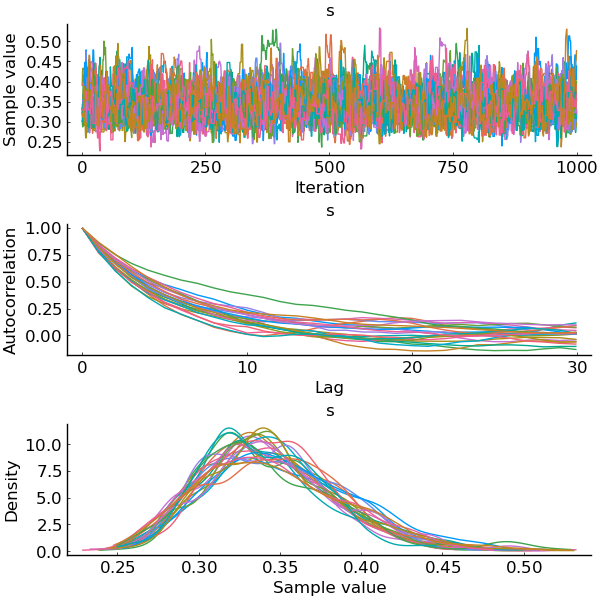

In [11]:
ch = group(chain,:s)
p1 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:traceplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p2 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:autocorplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p3 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:mixeddensity),
  grid=false, size=(250,100), titlefont=font(font_size))
pcτ = plot(p1, p2, p3, layout=(3,1), size=(600,600))

It is reasonable to pool together chains to generate smoother density plots. This is accomplished by setting the `seriestype` keyword argument to `:pooleddensity`. Alternatively, you can use the function called `pooleddensity`.

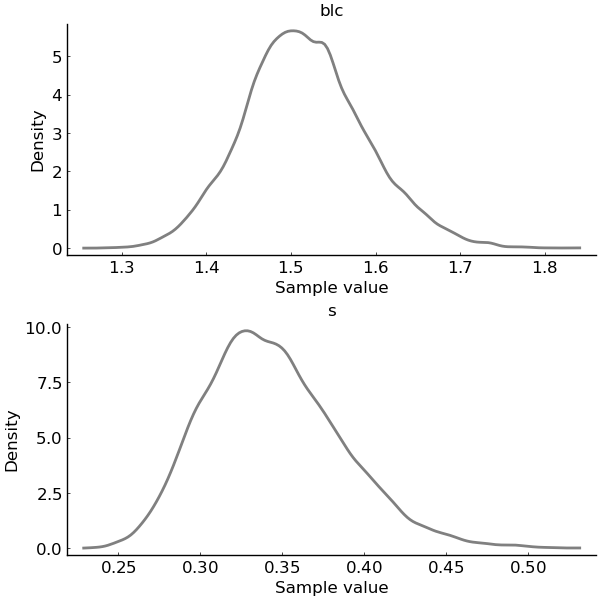

In [12]:
post_plot = plot(chain, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:pooleddensity),
  grid=false, titlefont=font(font_size), size=(600,600), color=:gray, linewidth=2)

### Posterior Predictive Distribution

In the code block below, we generate a posterier predictive distribution for the rt distribution.

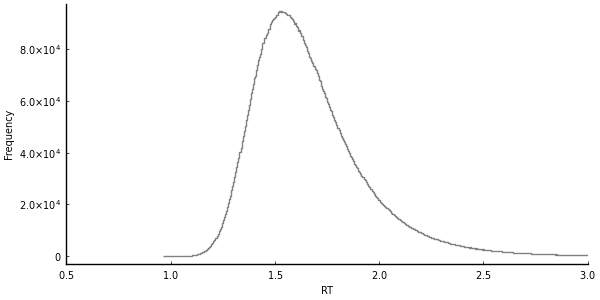

In [13]:
preds = posterior_predictive(x->simulate(n_trials; x...), chain, 1000)
rts = vcat(preds...)
post_pred = histogram(rts, xlabel = "RT", ylabel="Frequency", xaxis=font(7), yaxis=font(7),
    grid=false, color=:grey, leg=false, size=(600,300), titlefont=font(7),
    xlims=(.5,3.0))

Note that it is possible to pass a summary function in order to generate the posterior predictive distribution of a statistic (e.g. the default summary function is the idenity `x->x`, which returns raw data from the model). In the example below, the function `mean` is passed to summarize the data generated from the model. 

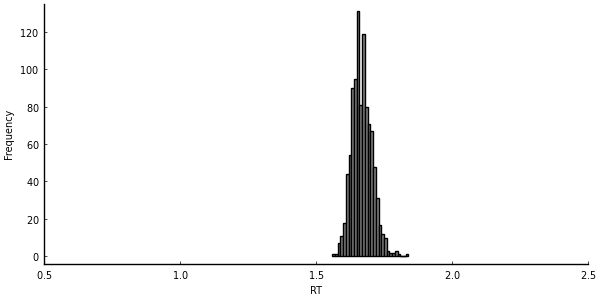

In [14]:
preds = posterior_predictive(x->simulate(n_trials; x...), chain, 1000, mean)
rts = vcat(preds...)
post_pred = histogram(rts, xlabel = "RT", ylabel="Frequency", xaxis=font(7), yaxis=font(7),
    grid=false, color=:grey, leg=false, size=(600,300), titlefont=font(7),
    xlims=(.5,2.5))